### Corona Lung Image Data Analysis using CNN

Aim: study of lungs images and telling whether the person is effected with corona or not effected.

!pip install opencv-python

Problem statement:
In this Section we are implementing Convolution Neural Network(CNN) Classifier for Classifying corona and normal images. 

In [174]:
#!pip install opencv-python
#!pip install tensorflow

import the libraries

In [175]:
import tensorflow
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import ZeroPadding2D
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop,SGD,Adam

In [176]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from concurrent.futures import ThreadPoolExecutor

In [177]:
import cv2 
import os
os.getcwd()

'c:\\Users\\acer\\Desktop\\CoronaLung DataSet_Analysis-CNN'

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set({'figure.facecolor':'yellow'})

import warnings
warnings.filterwarnings('ignore')

reading the single image

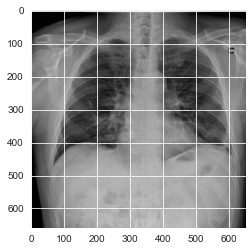

In [179]:
loading_img = cv2.imread("C:\\Users\\acer\\Desktop\\CoronaLung DataSet_Analysis-CNN\\data_source\\data\\Data\\train\\Covid\\covid (1).jpeg", 0) / 255
plt.imshow(loading_img, cmap='gray', vmin=0, vmax=1) 
sns.set({'figure.facecolor':'blue'})
plt.show()

building the CNN model

In [180]:
#initializing the neural network model
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))

#flattening transforms a 2-D matrix of features into a vector of features
classifier.add(Flatten())

#adding hidden layers
classifier.add(Dense(units=128,activation='relu'))
#adding output layers
classifier.add(Dense(units=1,activation='sigmoid'))

In [181]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

specifying optimizers: is used to reduce the cost calculated by entropy, the loss function is used to calculate the error, the metrics used to represent the efficiency of the model

In [182]:

adam = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy','Precision','Recall'])
classifier
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

setting the data directory and generate image data

In [183]:
#setting training data directory
train_dir=('C:\\Users\\acer\\Desktop\\CoronaLung DataSet_Analysis-CNN\\data_source\\data\\Data\\train\\')
#setting testing data directory
validation_dir=('C:\\Users\\acer\\Desktop\\CoronaLung DataSet_Analysis-CNN\\data_source\\data\\Data\\validate\\')

Data Augmentation

In [184]:
#all images will be rescaled by 1./255
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#spliting train and test data using imagedatagenerator
#train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.1,zoom_range=0.1,horizontal_flip=True)
#test_datagen = ImageDataGenerator(rescale=1./255)

#DataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True, 
                                    samplewise_center=True, 
                                    featurewise_std_normalization=True, 
                                    samplewise_std_normalization=True, 
                                    zca_whitening=False, zca_epsilon=1e-06, 
                                    rotation_range=40, width_shift_range=0.0,
                                    height_shift_range=0.0, brightness_range=(0.2, 0.2),
                                    shear_range=0.2, zoom_range=0.2, 
                                    channel_shift_range=0.0, fill_mode='nearest', 
                                    cval=0.0, horizontal_flip=True, vertical_flip=True,
                                    data_format=None, validation_split=0.0, dtype=None)
#validating
test_datagen = ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True, 
                                    samplewise_center=True, 
                                    featurewise_std_normalization=True, 
                                    samplewise_std_normalization=True, 
                                    zca_whitening=False, zca_epsilon=1e-06, 
                                    rotation_range=40, width_shift_range=0.0,
                                    height_shift_range=0.0, brightness_range=(0.2, 0.2),
                                    shear_range=0.2, zoom_range=0.2, 
                                    channel_shift_range=0.0, fill_mode='nearest', 
                                    cval=0.0, horizontal_flip=True, vertical_flip=True,
                                    data_format=None, validation_split=0.0, dtype=None)

Creating Training, Validation, and Testing Directories

In [185]:
#flow training images in batches using generator
#Training Set
#train_file='C:\\Users\\acer\\Desktop\\CoronaLung DataSet_Analysis-CNN\\data_source\\data\\Data\\train\\'
train_set = train_datagen.flow_from_directory(train_dir,
                                             target_size=(64,64),
                                             batch_size=64,
                                             class_mode='binary')
#flow training images in batches using generator
#Validation Set
#val_file='C:\\Users\\acer\\Desktop\\CoronaLung DataSet_Analysis-CNN\\data_source\\data\\Data\\validate\\'
validation_set = test_datagen.flow_from_directory(validation_dir,
                                           target_size=(64,64),
                                           batch_size = 64,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set /no output available
#test_set1 = test_datagen.flow_from_directory('test1',target_size=(64,64),batch_size=32,shuffle=False)

Found 243 images belonging to 2 classes.
Found 54 images belonging to 2 classes.


fitting the model

In [188]:
#Fitting Model
history = classifier.fit_generator(train_set,validation_data=validation_set,steps_per_epoch=150//32,epochs=30,validation_steps=50//32,verbose=2)

Epoch 1/30
4/4 - 7s - loss: 0.6304 - accuracy: 0.7243 - precision: 0.6432 - recall: 0.9917 - val_loss: 0.4150 - val_accuracy: 0.8333 - val_precision: 0.7576 - val_recall: 0.9615 - 7s/epoch - 2s/step
Epoch 2/30
4/4 - 7s - loss: 0.4920 - accuracy: 0.7202 - precision: 0.8171 - recall: 0.5583 - val_loss: 0.2778 - val_accuracy: 0.9259 - val_precision: 0.8929 - val_recall: 0.9615 - 7s/epoch - 2s/step
Epoch 3/30
4/4 - 6s - loss: 0.3132 - accuracy: 0.8765 - precision: 0.8358 - recall: 0.9333 - val_loss: 0.3803 - val_accuracy: 0.8148 - val_precision: 0.7222 - val_recall: 1.0000 - 6s/epoch - 1s/step
Epoch 4/30
4/4 - 6s - loss: 0.3223 - accuracy: 0.8642 - precision: 0.7959 - recall: 0.9750 - val_loss: 0.2455 - val_accuracy: 0.8704 - val_precision: 0.8065 - val_recall: 0.9615 - 6s/epoch - 1s/step
Epoch 5/30
4/4 - 6s - loss: 0.3119 - accuracy: 0.8848 - precision: 0.8538 - recall: 0.9250 - val_loss: 0.2904 - val_accuracy: 0.8519 - val_precision: 0.8000 - val_recall: 0.9231 - 6s/epoch - 1s/step
Epoch

fit function is used when the entire training dataset can fit into the memory and no data agumentation is applied. 
fit_generator is used when either we have a huge dataset to fit into our memory or when data agumentation needs to be applied

the above function trains the neural network using the traing set and evaluates its performance on the test set.
the function returns the metrics for each epoch which are predictions obtained in the training set and test set

Plotting the performance metrics graphs

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


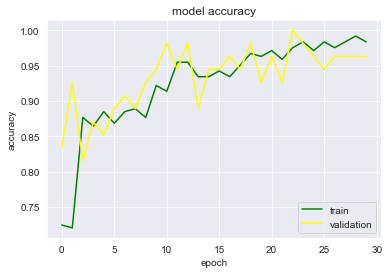

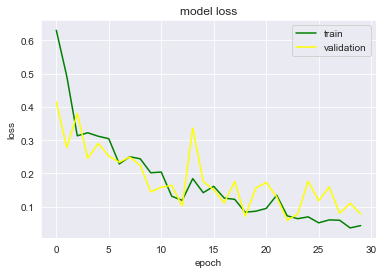

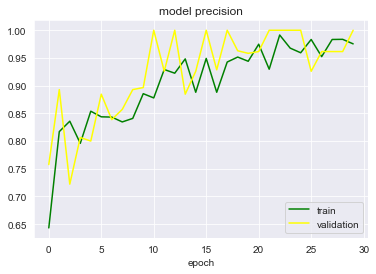

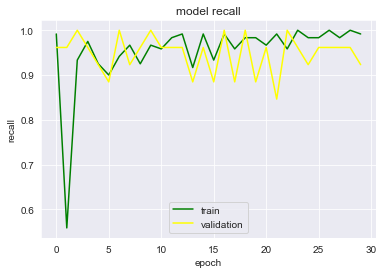

In [189]:
import matplotlib.pyplot as plt

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'],'green')
plt.plot(history.history['val_accuracy'],'yellow')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.title('loss')
# summarize history for loss
plt.plot(history.history['loss'],'green')
plt.plot(history.history['val_loss'],'yellow')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(history.history['precision'],'green')
plt.plot(history.history['val_precision'],'yellow')
plt.title('model precision')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['recall'],'green')
plt.plot(history.history['val_recall'],'yellow')
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower center')
plt.show()

In [193]:
from sklearn import metrics
y_pred = (classifier.predict_generator(validation_set) > 0.5).astype(int)
y_true = validation_set.classes

for name, value in zip(classifier.metrics_names, classifier.evaluate_generator(validation_set)):
    print(f'{name}: {value}')
print(f'F1 score: {metrics.f1_score(y_true, y_pred)}')

loss: 0.1508803516626358
accuracy: 0.9074074029922485
precision: 1.0
recall: 0.807692289352417
F1 score: 0.9600000000000001


In [198]:
classifier.save("C:\\Users\\acer\\Desktop\\CoronaLung DataSet_Analysis-CNN\\save_model\\covid_prediction.h5")

In [202]:
from keras.models import load_model
test_model = load_model("C:\\Users\\acer\\Desktop\\CoronaLung DataSet_Analysis-CNN\\save_model\\covid_prediction.h5")
test_model